# 1 Marginal, Conditional Probabilities

A statistician is interested in calculating the probability of scoring a basket from various distances (for this
question, assume that we disregard any other information such as player skill, etc). Let Y be the random
variable which is either score or miss. Let X ∈ {1, ..., 100} be the random variable that describes the distance
from the basket in which the player attempts the shot (we assume the distance is discrete). The statistician
decides that the probability of missing a shot with regard to distance should be:

P (Y = miss | X = x) = x\100

Therefore missing a shot with a distance of 1 has 0.01 probability while missing a shot with a distance
of 100 has probability of 1. To analyze his probabilistic model, the statistician collects data from 3 different
basketball players B = {1, 2, 3}. In the given file players.csv you can find the counts of shots taken from
each distance in each game. The first column has all the distances, and the remaining columns have the
counts of each shots taken from the corresponding distance for each player

In [40]:
#upload dataset

import pandas as pd
df=pd.read_csv('players.csv')

distances= df['Distance'].values
player1_shots= df['Player 1'].values
player2_shots= df['Player 2'].values
player3_shots= df['Player 3'].values

## 1.1 Plotting the Data

Plot bar graphs of the following distributions. We recommend using a bar plot for this plots. You are also
recommended to subplots plot multiple plots on the same page.

1. Probability of Y = miss for each distance.
2. Probability of Player 1 attempting a shot from each distance.
3. Probability of Player 2 attempting a shot from each distance.
4. Probability of Player 3 attempting a shot from each distance.

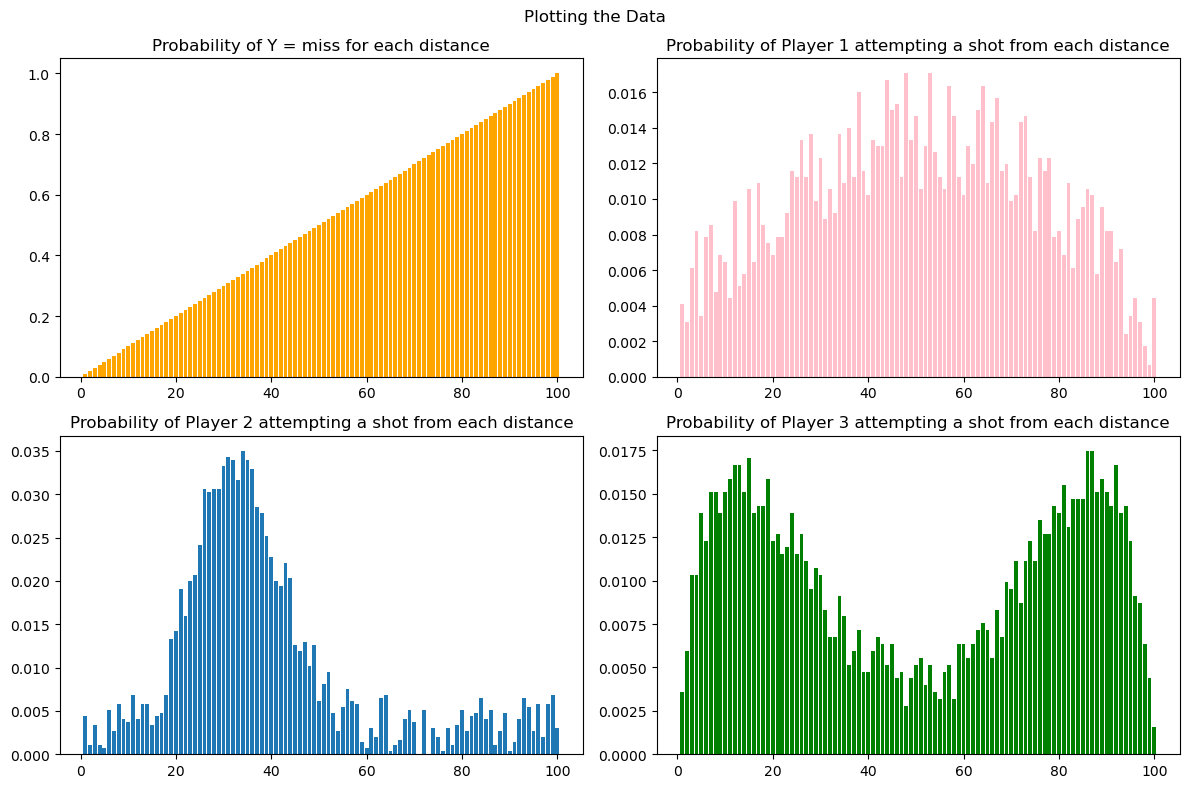

In [41]:
import matplotlib.pyplot as plt
import numpy as np
# Distance probablilty calculation 
# Returns an array

 
probability_miss=distances/100

player1_shots_sum=np.sum(player1_shots)
player1_shots_prob=player1_shots/player1_shots_sum

player2_shots_sum=np.sum(player2_shots)
player2_shots_prob=player2_shots/player2_shots_sum

player3_shots_sum=np.sum(player3_shots)
player3_shots_prob=player3_shots/player3_shots_sum

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot data in the first subplot
axes[0, 0].bar(distances, probability_miss,color='orange')
axes[0, 0].set_title('Probability of Y = miss for each distance')

# Plot data in the second subplot
axes[0, 1].bar(distances, player1_shots_prob, color='pink')
axes[0, 1].set_title('Probability of Player 1 attempting a shot from each distance')

# Plot data in the third subplot
axes[1, 0].bar(distances, player2_shots_prob)
axes[1, 0].set_title('Probability of Player 2 attempting a shot from each distance')

# Plot data in the third subplot
axes[1, 1].bar(distances, player3_shots_prob, color='green')
axes[1, 1].set_title('Probability of Player 3 attempting a shot from each distance')

# Add a title for the entire figure
fig.suptitle('Plotting the Data')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


## 1.2 Calculating the Likelihood 

Assume that you randomly select 5 shots from the data for each distance. Plot the probability of obtaining
the sequence {miss, miss, score, miss, score}. Again, use a bar plot.

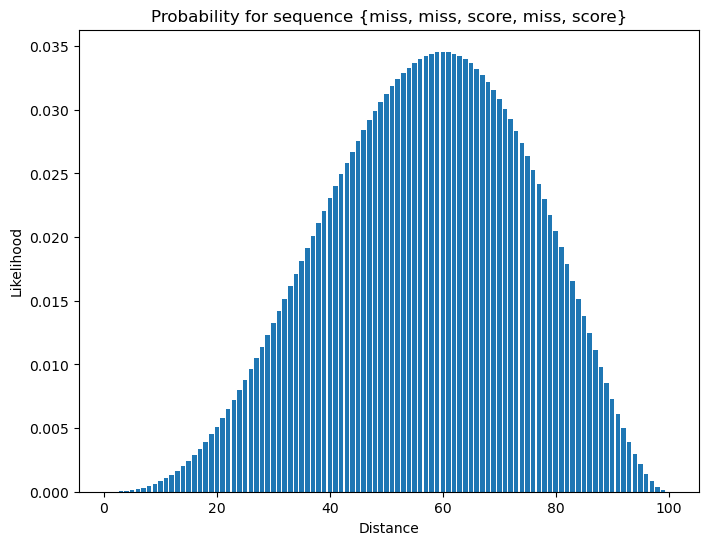

In [42]:
sequence= ['miss', 'miss', 'score', 'miss', 'score']
sequence_probabilities=[]
Probability_miss= distances/100
Probability_score= 1- Probability_miss

for d in range(len(distances)):
  
    # Calculate the binomial probability of the given sequence
    binomial_prob = (Probability_miss[d]**3) * (Probability_score[d]**2)
    sequence_probabilities.append(binomial_prob)

plt.figure(figsize=(8, 6))
plt.bar(distances, sequence_probabilities, width=0.8)
plt.title('Probability for sequence {miss, miss, score, miss, score}')
plt.xlabel('Distance')
plt.ylabel('Likelihood')
plt.show()

## 1.3 Bayes’ Rule

Suppose you are given P (Y = miss | X) and P (X). Show how to compute P (X | Y = score) and P (X | Y = miss).
Note that in this question, there is no coding involved, you are just asked to use the Bayes’ Rule.

Given:  P (Y = miss | X) and P (X)
To compute:  P (X | Y = score) and P (X | Y = miss)


Solution (a): 

P (X | Y = score)= P (Y=score | X) * P (X) / P(Y)
Through the law of total probability, we can say that there is proportionality, hence the formula becomes. 
P (X | Y = score)= P (Y=score | X) * P (X)

To calculate P (Y=score | X), 1- P (Y = miss | X)

P (X | Y = score)= (1- P (Y = miss | X)) * P (X)

Solution (b): 

P (X | Y = miss) = P (Y=miss | X) * P (X) / P(Y)

Through the law of total probability, we can say that there is proportionality, hence the formula becomes. 

P (X | Y = miss) = P (Y=miss | X) * P (X)


## 1.4 Number of Observation and the Posterior

Suppose that Player 1, B = 1, attempts shots from a distance value d. Plot the posterior distribution over
each distance given the outcomes of the attempted shots in each scenario.

1. The Player 1 attempts a shot from d, and he scores.
2. The Player 1 attempts 3 shots from d, and he scores all of them.
3. The Player 1 attempts 5 shots from d, and he scores 2 of them and misses 3 of them.
4. The Player 1 attempts 40 shots from d, and he scores 15 of them and misses 25 of them.
Now examine your plot from Scenario 4. What do you think distance d was based on this plot?


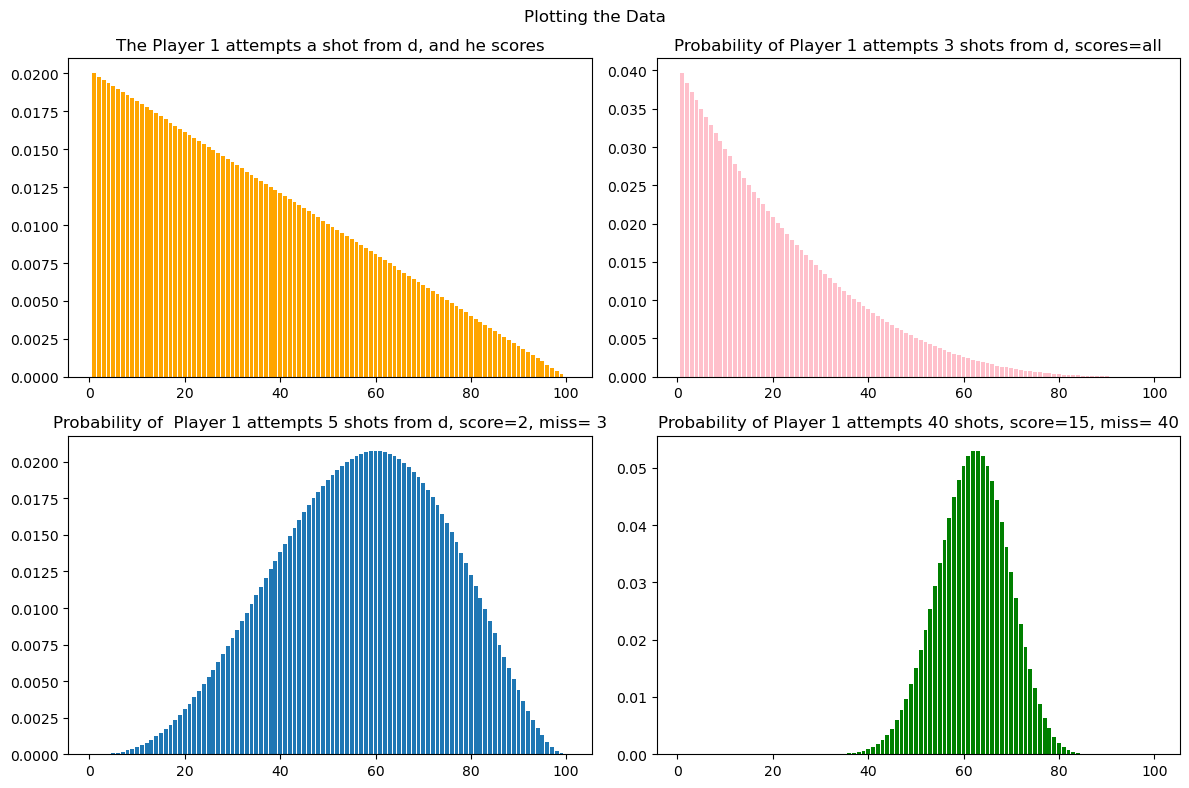

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


# The Player 1 attempts a shot from d, and he scores--------------------------------------------
for d in range(len(distances)):
    posterior_distribution = Probability_score * (0.01)
    
posterior_distribution = posterior_distribution / np.sum(posterior_distribution)

# Plot data in the first subplot
axes[0, 0].bar(distances, posterior_distribution, color='orange')
axes[0, 0].set_title('The Player 1 attempts a shot from d, and he scores')

# The Player 1 attempts 3 shots from d, and he scores all of them--------------------------------------------

for d in range(len(distances)):
    posterior_distribution = (Probbaility_score**3) * (0.01)

posterior_distribution = posterior_distribution / np.sum(posterior_distribution)

# Plot data in the second subplot
axes[0, 1].bar(distances, posterior_distribution, color='pink')
axes[0, 1].set_title('Probability of Player 1 attempts 3 shots from d, scores=all')

# The Player 1 attempts 5 shots from d, and he scores 2 of them and misses 3 of them-----------------------------
for d in range(len(distances)):
    posterior_distribution = (Probability_score**2) *(Probability_miss**3)* (0.01)

# Normalize the posterior distribution to make it a proper probability distribution
posterior_distribution = posterior_distribution / np.sum(posterior_distribution)

# Plot data in the third subplot
axes[1, 0].bar(distances, posterior_distribution)
axes[1, 0].set_title('Probability of  Player 1 attempts 5 shots from d, score=2, miss= 3')

# The Player 1 attempts 40 shots from d, and he scores 15 of them and misses 25 of them--------------------------

for d in range(len(distances)):
    posterior_distribution = (Probability_score**15) *(Probability_miss**25)* (0.01)

# Normalize the posterior distribution to make it a proper probability distribution
posterior_distribution = posterior_distribution / np.sum(posterior_distribution)


# Plot data in the third subplot
axes[1, 1].bar(distances, posterior_distribution, color='green')
axes[1, 1].set_title('Probability of Player 1 attempts 40 shots, score=15, miss= 40')

# Add a title for the entire figure
fig.suptitle('Plotting the Data')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


## 1.5 Marginalization

Suppose that we choose a random player B out of three available players in our dataset. Each player has
the following probabilities of being chosen: P (B = 1) = 0.25, P (B = 2) = 0.25, P (B = 3) = 0.5. Then, the
chosen player attempts 10 shots from a distance d. He misses 8 of his shots, and makes 2 of his shots.

### 1. Given the outcome of shots, plot the posterior distribution over different distances.

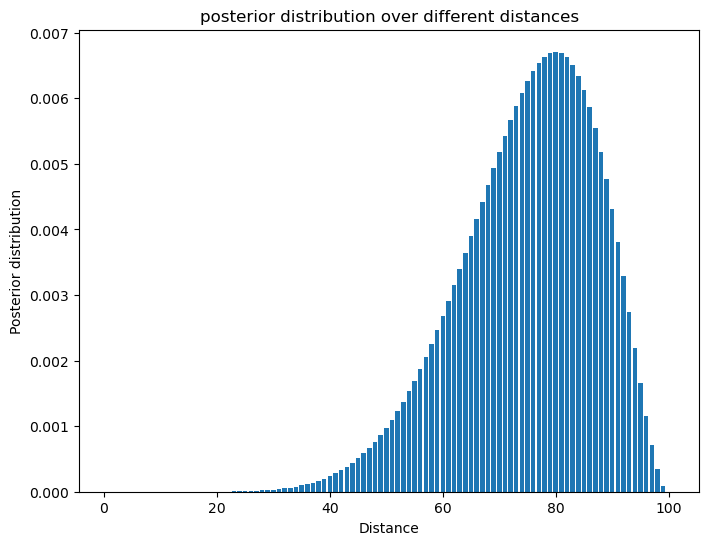

In [44]:
sequence_probabilities=[]
Probability_miss= distances/100
Probability_score= 1 - Probability_miss

for d in range(len(distances)):
    binomial_prob = (Probability_miss[d]**8) * (Probability_score[d]**2)
    sequence_probabilities.append(binomial_prob)

plt.figure(figsize=(8, 6))
plt.bar(distances, sequence_probabilities, width=0.8)
plt.title('posterior distribution over different distances')
plt.xlabel('Distance')
plt.ylabel('Posterior distribution')
plt.show()

### 2. Given the outcome of shots, plot the posterior distribution over different players.

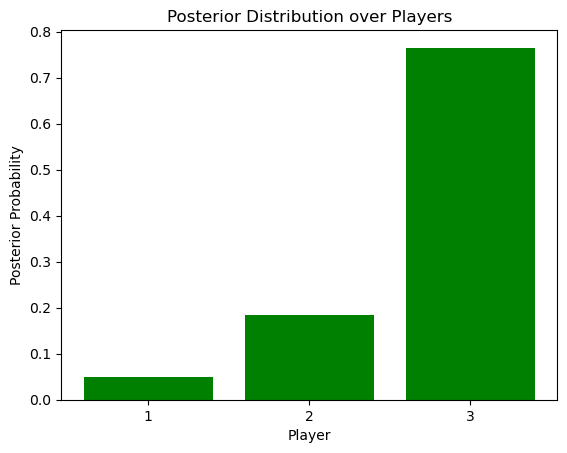

In [76]:
from scipy.stats import binom

# Given probabilities of choosing each player
prior_player_prob = np.array([0.25, 0.25, 0.5])

player=np.arange(1, 4)
likelihood= binom.pmf(shots_made, total_shots, player / 100)

# Calculate unnormalized posterior distribution
posterior_unnormalized = prior_player_prob * likelihood

# Normalize the distribution
posterior = posterior_unnormalized / np.sum(posterior_unnormalized)

# Plot the posterior distribution
players = np.arange(1, 4)
plt.bar(players, posterior, color='green')
plt.xticks(players)
plt.xlabel('Player')
plt.ylabel('Posterior Probability')
plt.title('Posterior Distribution over Players')
plt.show()


### 3. Which distance has the largest posterior?

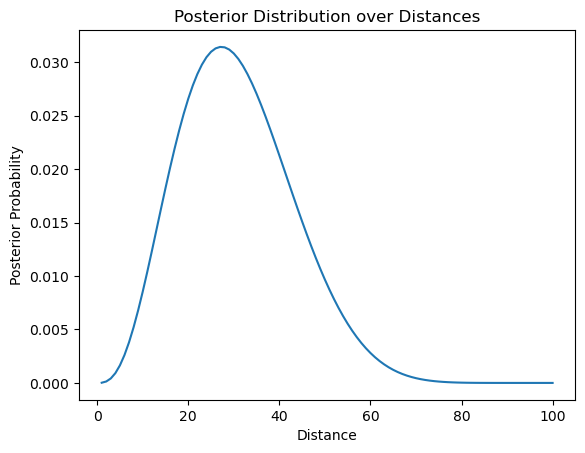

The distance with the largest posterior is: 27


In [79]:
# Given prior distribution over distances
prior_distance = distances

likelihood = binom.pmf(shots_made, total_shots, prior_distance / 100 )

# Calculate unnormalized posterior distribution over distances
posterior_unnormalized = prior_distance * likelihood

# Normalize the distribution
posterior = posterior_unnormalized / np.sum(posterior_unnormalized)

# distance with the highest posterior probability
# Add 1 for distance, since it starts from 1
max_posterior_distance = np.argmax(posterior) + 1  

# Plot the posterior distribution over distances
plt.plot(prior_distance, posterior)
plt.xlabel('Distance')
plt.ylabel('Posterior Probability')
plt.title('Posterior Distribution over Distances')
plt.show()

print("The distance with the largest posterior is:", max_posterior_distance)


### 4. Which player has the largest posterior?

third player

# 2 MLE and MAP

Answer in report

# 3 Building a Spam Classifier with Naive Bayes

### Dataset

In [84]:
#upload dataset

import pandas as pd
# Read the datasets with space-separated values
train_labels = pd.read_csv('train-labels.txt', header=None).astype(int)
train_features = pd.read_csv('train-features.txt', sep=' ', header=None).astype(int)
test_labels = pd.read_csv('test-labels.txt', header=None).astype(int)
test_features = pd.read_csv('test-features.txt', sep=' ', header=None).astype(int)

# Convert dataframes to numpy arrays
train_labels = train_labels.values.flatten()
train_features = train_features.values
test_labels = test_labels.values.flatten()
test_features = test_features.values

## Bag-of-Words Representation and Multinomial Naive Bayes Model

## Question 3.1

If the the ratio of the classes in a dataset is close to each other, it is a called “balanced” class distribution if not it is skewed. What is the percentage of spam emails in the train.labels.txt.
Is the training set balanced or skewed towards one of the classes?


In [88]:
# Count the occurrences of 1 in the 'Label' column
count_ones = (train_labels == 1).sum()
total_values = train_labels.size
percentage=(count_ones/total_values)*100
print("percentage for spam emails: ", percentage )

if(int(percentage) > 40):
    print("Dataset is balanced")

percentage for spam emails:  50.0
Dataset is balanced


## Question 3.2

How many parameters do we need to estimate for this model?

Answer in report

## Question 3.3

Train a Naive Bayes classifier using all of the data in the training set (
train-features.txt and train-labels.txt). Test your classifier on the test data (test-features.txt
and test-labels.txt, and report the testing accuracy as well as how many wrong predictions were made.
In estimating the model parameters use the above MLE estimator. IMPORTANT: if it arises in your code,
define 0 ∗ log 0 = 0 and a ∗ log 0, is as it is, that is -inf ). In case of ties, you should predict “non-spam”. In
the written part of your report what your test set accuracy is? What did your classifier end up predicting?
Why is using the MLE estimate is a bad idea in this situation?

In [91]:
import numpy as np
import pandas as pd

def calculate_mle_parameters(features, labels):
    num_emails, vocab_size = features.shape
    num_spam = np.sum(labels)

    theta_y0 = (np.sum(features[labels == 0], axis=0) + 1) / (np.sum(features[labels == 0]) + vocab_size)
    theta_y1 = (np.sum(features[labels == 1], axis=0) + 1) / (np.sum(features[labels == 1]) + vocab_size)

    pi_y1 = num_spam / num_emails

    return theta_y0, theta_y1, pi_y1

def predict(features, theta_y0, theta_y1, pi_y1):
    log_prob_y0 = np.log(1 - pi_y1) + np.sum(np.log(theta_y0) * features, axis=1)
    log_prob_y1 = np.log(pi_y1) + np.sum(np.log(theta_y1) * features, axis=1)

    predictions = np.argmax(np.column_stack((log_prob_y0, log_prob_y1)), axis=1)

    return predictions

def calculate_accuracy(predictions, labels):
    correct = np.sum(predictions == labels)
    total = len(labels)
    accuracy = correct / total
    return accuracy



# Train the Naive Bayes classifier using MLE
theta_y0_mle, theta_y1_mle, pi_y1_mle = calculate_mle_parameters(train_features, train_labels)

# Make predictions on test data
predictions_mle = predict(test_features, theta_y0_mle, theta_y1_mle, pi_y1_mle)

# Print the predictions
print("Predictions:")
print(predictions_mle)

# Calculate and print accuracy
accuracy_mle = calculate_accuracy(predictions_mle, test_labels)
print(f'Test set accuracy (MLE): {accuracy_mle:.2%}')


Predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1]
Test set accuracy (MLE): 97.31%


## Question 3.4

Extend your classifier so that it can compute a MAP estimate of θ
parameters using a fair Dirichlet prior. This corresponds to additive smoothing. The prior is fair in the
sense that it “hallucinates” that each word appears additionally α times in the train set.

For this question set α = 1. Train your classifier using all of the training sets and have it classify all of
the test sets and report test-set classification accuracy. Comment on the results.


In [93]:
import numpy as np
import pandas as pd

def calculate_map_parameters(features, labels, alpha=1):
    num_emails, vocab_size = features.shape
    num_spam = np.sum(labels)

    theta_y0 = (np.sum(features[labels == 0], axis=0) + alpha) / (np.sum(features[labels == 0]) + alpha * vocab_size)
    theta_y1 = (np.sum(features[labels == 1], axis=0) + alpha) / (np.sum(features[labels == 1]) + alpha * vocab_size)

    pi_y1 = (num_spam + alpha) / (num_emails + alpha * 2)

    return theta_y0, theta_y1, pi_y1



# Train the Naive Bayes classifier using MAP with additive smoothing
alpha = 1
theta_y0_map, theta_y1_map, pi_y1_map = calculate_map_parameters(train_features, train_labels, alpha)

# Make predictions on test data using MAP estimates
predictions_map = predict(test_features, theta_y0_map, theta_y1_map, pi_y1_map)

# Calculate and print accuracy
accuracy_map = calculate_accuracy(predictions_map, test_labels)
print("Test set accuracy:", accuracy_map)


Test set accuracy: 0.9730769230769231
